### Final Challenge - AceleraDev Data Science 2020

GOAL: The purpose of this project is to provide an automated service that recommends leads to a user given their current customer list (Portfolio).

### Loading libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sqy
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import Normalizer
import warnings
warnings.simplefilter(action = 'ignore')

### Loading datasets

##### Main dataframe

In [2]:
df = pd.read_csv('estaticos_market.csv', error_bad_lines=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Columns: 182 entries, Unnamed: 0 to qt_filiais
dtypes: bool(9), float64(144), int64(2), object(27)
memory usage: 614.1+ MB


In [4]:
df.shape

(462298, 182)

In [5]:
df.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
# Chechinkg columns
df.columns

Index(['Unnamed: 0', 'id', 'fl_matriz', 'de_natureza_juridica', 'sg_uf',
       'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_empresa_anos',
       'idade_emp_cat',
       ...
       'media_meses_servicos', 'max_meses_servicos', 'min_meses_servicos',
       'qt_funcionarios', 'qt_funcionarios_12meses', 'qt_funcionarios_24meses',
       'tx_crescimento_12meses', 'tx_crescimento_24meses', 'tx_rotatividade',
       'qt_filiais'],
      dtype='object', length=182)

In [7]:
# Checking data types
df.dtypes

Unnamed: 0                   int64
id                          object
fl_matriz                     bool
de_natureza_juridica        object
sg_uf                       object
                            ...   
qt_funcionarios_24meses    float64
tx_crescimento_12meses     float64
tx_crescimento_24meses     float64
tx_rotatividade            float64
qt_filiais                   int64
Length: 182, dtype: object

##### Auxiliars dataframes

In [8]:
df1 = pd.read_csv('estaticos_portfolio1.csv', usecols=['id'])
df2 = pd.read_csv('estaticos_portfolio2.csv', usecols=['id'])
df3 = pd.read_csv('estaticos_portfolio3.csv', usecols=['id'])

In [9]:
df1.head(1)

,id
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...


In [10]:
df2.head(1)

,id
0,09e95c1a84049001d086470a8f320a19b076f955a89122...


In [11]:
df3.head(1)

,id
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...


### Analysing main dataframe

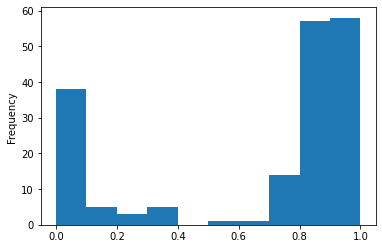

In [12]:
# Creating an auxiliar dataframe to analyze the consistency of the variables
cons = pd.DataFrame({'features' : df.columns,
                    'type': df.dtypes,
                    'missing_values' : df.isna().sum(),
                    'size' : df.shape[0],
                    'unicos': df.nunique()})
cons['percentage'] = round(cons['missing_values'] / cons['size'],2)
cons['percentage'].plot.hist(bins = 10);

##### Hypotesis 1: Columns containing only null values are not relevant

In [13]:
null_features = df.isna().sum()
null_features = null_features[null_features.isin([df.shape[0]])]
list_null_features = list(null_features.index)
qtd_list_null_features = len(list(null_features.index))
print('There are', qtd_list_null_features, 'features with only null values, which are:', list_null_features)

There are 5 features with only null values, which are: ['qt_alteracao_socio_total', 'qt_alteracao_socio_90d', 'qt_alteracao_socio_180d', 'qt_alteracao_socio_365d', 'grau_instrucao_macro_desconhecido']


In [14]:
# Dropping columns containing all values as null
df.drop(columns=list_null_features, inplace=True)
print('The new dataframe shape is', df.shape)

The new dataframe shape is (462298, 177)


##### Hypotesis 2: Columns containing null values > 50% could not be relevant for the analysis.
To reach this value, in addition to the amount of null data, it was considered the relevance of each column to the problem solution.

In [15]:
null_features_fraction = (df.isna().sum()/df.shape[0]*100) > 50.0 
null_features_fraction = null_features_fraction[null_features_fraction.isin([True])]
len(list(null_features_fraction.index))
list_null_features_fraction = list(null_features_fraction.index)
qtd_list_null_features_fraction = len(list(null_features_fraction.index))
print('There are', qtd_list_null_features_fraction, 'features with >50% of null values,',  
      'which are:', list_null_features_fraction)

There are 126 features with >50% of null values, which are: ['vl_total_tancagem', 'vl_total_veiculos_antt', 'vl_total_veiculos_leves', 'vl_total_veiculos_pesados', 'qt_art', 'vl_total_tancagem_grupo', 'vl_total_veiculos_antt_grupo', 'vl_potenc_cons_oleo_gas', 'de_indicador_telefone', 'vl_frota', 'qt_socios_st_suspensa', 'qt_socios_masculino', 'qt_socios_feminino', 'qt_socios_pep', 'qt_socios_pj_ativos', 'qt_socios_pj_nulos', 'qt_socios_pj_baixados', 'qt_socios_pj_suspensos', 'qt_socios_pj_inaptos', 'vl_idade_media_socios_pj', 'vl_idade_maxima_socios_pj', 'vl_idade_minima_socios_pj', 'qt_coligados', 'qt_socios_coligados', 'qt_coligados_matriz', 'qt_coligados_ativo', 'qt_coligados_baixada', 'qt_coligados_inapta', 'qt_coligados_suspensa', 'qt_coligados_nula', 'idade_media_coligadas', 'idade_maxima_coligadas', 'idade_minima_coligadas', 'coligada_mais_nova_ativa', 'coligada_mais_antiga_ativa', 'idade_media_coligadas_ativas', 'coligada_mais_nova_baixada', 'coligada_mais_antiga_baixada', 'ida

In [16]:
# Dropping features containing null values > 50% 
df.drop(columns=list_null_features_fraction, inplace=True)
print('The new dataframe shape is', df.shape)

The new dataframe shape is (462298, 51)


##### Checking remaining features and analysing their relevance

In [17]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

qt_socios_st_regular                     0.335102
idade_minima_socios                      0.327931
idade_maxima_socios                      0.327931
idade_media_socios                       0.327931
empsetorcensitariofaixarendapopulacao    0.311118
qt_socios_pj                             0.248954
qt_socios_pf                             0.248954
qt_socios                                0.248954
fl_optante_simei                         0.178917
fl_optante_simples                       0.178917
nm_micro_regiao                          0.126970
nm_meso_regiao                           0.126970
nu_meses_rescencia                       0.097937
de_faixa_faturamento_estimado            0.059514
vl_faturamento_estimado_grupo_aux        0.059514
de_faixa_faturamento_estimado_grupo      0.059514
vl_faturamento_estimado_aux              0.059514
de_saude_rescencia                       0.032124
de_saude_tributaria                      0.032124
de_nivel_atividade                       0.024158


##### Dropping additional irrelevant features

In [18]:
features_to_drop = ['Unnamed: 0','fl_email','fl_telefone','qt_socios_st_regular','qt_socios_pj',
                'qt_socios_pf','fl_simples_irregular','fl_optante_simei','fl_optante_simples']
print('Irrelevant features:', len(features_to_drop))

Irrelevant features: 9


**Unnamed**: 0: numeração das observações

**fl_email**: boolean value, true if the cnpj has an email registered at the IRF database. 

**fl_telefone**: boolean value, true if the company has a phone number registered in IRS database.

**qt_socios_st_regular**: integer value, quantity of partners with regular situation under IRS - Receita Federal

**qt_socios_pj**:  integer value, quantity of partners/shareholders of the cnpj that are companies

**qt_socios_pf**: integer value, quantity of partners/shareholders of the cnpj that are persons

**fl_simples_irregular**: boolean, true if the company is taxed under the SIMPLES regime and has a impeditive CNAE (economic activities that are not allowed to be taxed according to the simples regime) revenue above the limit of the regime.

**fl_optante_simei**: boolean, true if the company is taxed as an MEI - Individual Micro Entrepreneur (Micro Empreendedor Individual)

**fl_optante_simples**: boolean, true if the company is taxed according to SIMPLES regime

In [19]:
# Dropping remaining irrelevant features
df.drop(columns=features_to_drop, inplace=True)
print('The updated dataframe shape is', df.shape)

The updated dataframe shape is (462298, 42)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Data columns (total 42 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     462298 non-null  object 
 1   fl_matriz                              462298 non-null  bool   
 2   de_natureza_juridica                   462298 non-null  object 
 3   sg_uf                                  462298 non-null  object 
 4   natureza_juridica_macro                462298 non-null  object 
 5   de_ramo                                462298 non-null  object 
 6   setor                                  460371 non-null  object 
 7   idade_empresa_anos                     462298 non-null  float64
 8   idade_emp_cat                          462298 non-null  object 
 9   fl_me                                  462298 non-null  bool   
 10  fl_sa                                  462298 non-null  

##### Creating a new dataset and replacing the null data by 'NOT INFORMED'

In [21]:
#Selecting data for the proposed solution
base = ['id','sg_uf','de_ramo','setor','nm_divisao','nm_segmento','de_nivel_atividade',
        'nm_meso_regiao','nm_micro_regiao','de_faixa_faturamento_estimado','idade_emp_cat',
        'de_natureza_juridica','fl_me','fl_sa','fl_epp','fl_mei','fl_ltda','qt_filiais']
print('The collumns choosen for this solution are', len(base))
clean_data = df[base]
clean_data.fillna('NOT INFORMED', inplace=True)

The collumns choosen for this solution are 18


In [22]:
clean_data.isnull().sum()

id                               0
sg_uf                            0
de_ramo                          0
setor                            0
nm_divisao                       0
nm_segmento                      0
de_nivel_atividade               0
nm_meso_regiao                   0
nm_micro_regiao                  0
de_faixa_faturamento_estimado    0
idade_emp_cat                    0
de_natureza_juridica             0
fl_me                            0
fl_sa                            0
fl_epp                           0
fl_mei                           0
fl_ltda                          0
qt_filiais                       0
dtype: int64

**Feature engineering**
 
Features containing all the missing data (5 columns) were eliminated.

Features with more than 50% of missing data (126 columns) were eliminated.

The remaining columns were analysed manualy, to check the relevance of the data for this solution and 9 columns were eliminated.

18 columns were chosen manually, where the null data were treated by inserting 'WITHOUT INFORMATION'. Since all were categorical, no observation was left out of the analysis.

For training the model, 9 of these features were considered most important for the solution.

In [23]:
print('Original dataset size', df.shape)
print('Baseline dataset size', clean_data.shape)

Original dataset size (462298, 42)
Baseline dataset size (462298, 18)


In [24]:
clean_data.sample(5)

,id,sg_uf,de_ramo,setor,nm_divisao,nm_segmento,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,idade_emp_cat,de_natureza_juridica,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,qt_filiais
445060,a9bd2cb83cc0cc0ec0da84504dd8f643a224d0369c9799...,MA,COMERCIO VAREJISTA,COMERCIO,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,BAIXA,NORTE MARANHENSE,AGLOMERACAO URBANA DE SAO LUIS,"DE R$ 81.000,01 A R$ 360.000,00",> 20,SOCIEDADE EMPRESARIA LIMITADA,False,False,False,False,False,0
351684,3dc5f5047176a51ff1904458367b260e5a32b5d68d3740...,RN,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,ALTA,LESTE POTIGUAR,NATAL,"DE R$ 81.000,01 A R$ 360.000,00",5 a 10,EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITAD...,False,False,False,False,False,2
183987,b63b1a3d6c61db2e883ee8bb02f4f0dac3656082c255d7...,MA,COMERCIO VAREJISTA,COMERCIO,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,BAIXA,NORTE MARANHENSE,AGLOMERACAO URBANA DE SAO LUIS,"DE R$ 81.000,01 A R$ 360.000,00",<= 1,EMPRESARIO INDIVIDUAL,False,False,False,False,False,0
123085,f4a1f8d492cbff190c6f96bb835bbe3c65f2a38c759436...,AM,"CULTURA, ESPORTE E RECREACAO",SERVIÇO,ATIVIDADES ESPORTIVAS E DE RECREACAO E LAZER,ARTES CULTURA ESPORTE E RECREACAO,MEDIA,CENTRO AMAZONENSE,MANAUS,NOT INFORMED,<= 1,SOCIEDADE EMPRESARIA LIMITADA,False,False,False,False,False,0
409748,ab13321c07df21eab366c85036026f3c3ec01e9edcba3f...,AC,SERVICOS DIVERSOS,SERVIÇO,OUTRAS ATIVIDADES DE SERVICOS PESSOAIS,OUTRAS ATIVIDADES DE SERVICOS,MEDIA,VALE DO ACRE,BRASILEIA,"ATE R$ 81.000,00",5 a 10,EMPRESARIO INDIVIDUAL,False,False,False,True,False,0


### Data Expoitation

##### Encoding features

In [26]:
feature_transform = list(clean_data.select_dtypes(include=['object','bool']).columns)
feature_transform.remove('id')
encoder = LabelEncoder()
for label in feature_transform:
    label_feature = 'cod_' + label
    clean_data[label_feature] = encoder.fit_transform(clean_data[label])

In [27]:
clean_data.head()

,id,sg_uf,de_ramo,setor,nm_divisao,nm_segmento,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,...,cod_nm_meso_regiao,cod_nm_micro_regiao,cod_de_faixa_faturamento_estimado,cod_idade_emp_cat,cod_de_natureza_juridica,cod_fl_me,cod_fl_sa,cod_fl_epp,cod_fl_mei,cod_fl_ltda
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,RN,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,ALTA,LESTE POTIGUAR,NATAL,"DE R$ 1.500.000,01 A R$ 4.800.000,00",...,6,48,2,1,60,0,0,0,0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,PI,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,BAIXA,CENTRO NORTE PIAUIENSE,TERESINA,"DE R$ 81.000,01 A R$ 360.000,00",...,4,70,10,0,17,0,0,0,1,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,AM,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,MEDIA,CENTRO AMAZONENSE,MANAUS,"ATE R$ 81.000,00",...,2,43,1,3,17,0,0,0,1,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,AM,SERVICOS DIVERSOS,SERVIÇO,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,MEDIA,CENTRO AMAZONENSE,MANAUS,"DE R$ 81.000,01 A R$ 360.000,00",...,2,43,10,3,17,0,0,0,0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,RN,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,ALTA,LESTE POTIGUAR,NATAL,"DE R$ 81.000,01 A R$ 360.000,00",...,6,48,10,0,17,0,0,0,0,0


In [28]:
clean_data.describe()

,qt_filiais,cod_sg_uf,cod_de_ramo,cod_setor,cod_nm_divisao,cod_nm_segmento,cod_de_nivel_atividade,cod_nm_meso_regiao,cod_nm_micro_regiao,cod_de_faixa_faturamento_estimado,cod_idade_emp_cat,cod_de_natureza_juridica,cod_fl_me,cod_fl_sa,cod_fl_epp,cod_fl_mei,cod_fl_ltda
count,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.0,462298.000000,462298.000000
mean,28.737044,2.693442,12.867036,2.834875,35.215902,10.458488,1.235606,7.543833,38.700637,7.625387,2.238026,25.368922,0.002628,0.018239,0.0,0.326413,0.002687
std,468.626094,1.412396,9.777025,1.887715,22.799909,4.695568,1.002345,4.595003,20.728003,3.774880,1.837414,18.805287,0.051198,0.133816,0.0,0.468901,0.051763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,2.000000,5.000000,1.000000,28.000000,9.000000,0.000000,4.000000,27.000000,7.000000,0.000000,17.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,3.000000,5.000000,2.000000,30.000000,9.000000,2.000000,8.000000,43.000000,10.000000,3.000000,17.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,4.000000,22.000000,5.000000,36.000000,13.000000,2.000000,10.000000,49.000000,10.000000,4.000000,17.000000,0.000000,0.000000,0.0,1.000000,0.000000
max,9647.000000,5.000000,32.000000,5.000000,87.000000,21.000000,4.000000,19.000000,73.000000,12.000000,5.000000,66.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [29]:
#Selecting features encoded to train model
train = ['cod_de_natureza_juridica','cod_sg_uf','cod_de_ramo','cod_setor','cod_nm_divisao','cod_nm_segmento',
         'cod_de_nivel_atividade','cod_nm_meso_regiao','cod_de_faixa_faturamento_estimado', 'cod_idade_emp_cat']
print('Total number of features selected to train the model:', len(train))

Total number of features selected to train the model: 10


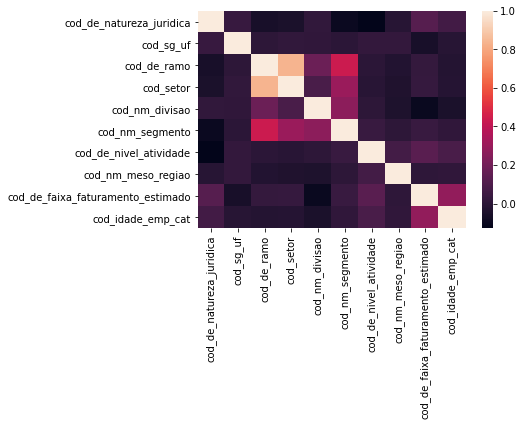

In [30]:
# Correlation between selected features
sns.heatmap(clean_data[train].corr());

### Analysing Portfolios

In [31]:
# Checking potential leads
print('First company has a portfolio with', df1.shape[0], 'leads')
print('Second company has a portfolio with', df2.shape[0], 'leads')
print('Third company has a portfolio with', df3.shape[0], 'leads')

First company has a portfolio with 555 leads
Second company has a portfolio with 566 leads
Third company has a portfolio with 265 leads


In [32]:
# Adding Id to the portfolios
df1['portfolio'] = 1
df2['portfolio'] = 2
df3['portfolio'] = 3

In [33]:
# Appending leads
df_clientes = df1.append(df2).append(df3)
# Identifying leads in the market database
df = df.join(df_clientes.set_index('id'), on='id')
clean_data = clean_data.join(df_clientes.set_index('id'), on='id')
# Filling remaining data in market database with 0
df['portfolio'].fillna(0, inplace=True)
clean_data['portfolio'].fillna(0, inplace=True)
print('\n*** Original database***')
print(df['portfolio'].value_counts())
print('\n*** Processed database***')
print(clean_data['portfolio'].value_counts())


*** Original database***
0.0    461020
2.0       566
1.0       555
3.0       265
Name: portfolio, dtype: int64

*** Processed database***
0.0    461020
2.0       566
1.0       555
3.0       265
Name: portfolio, dtype: int64


In [34]:
# Separating portfolios for Analysis
df_me = df.query('portfolio == 0')
df_p1 = df.query('portfolio == 1')
df_p2 = df.query('portfolio == 2')
df_p3 = df.query('portfolio == 3')

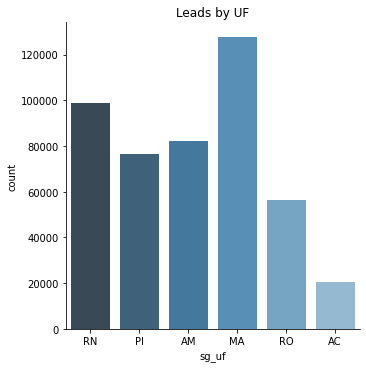

In [35]:
# Analysing leads by UF
df_uf = df[['sg_uf','portfolio', 'setor']]

# Leads
sns.catplot(x="sg_uf", 
            kind="count",
            palette="Blues_d", 
            data=df_uf.query('portfolio in (0,1,2,3)'));
plt.title("Leads by UF");

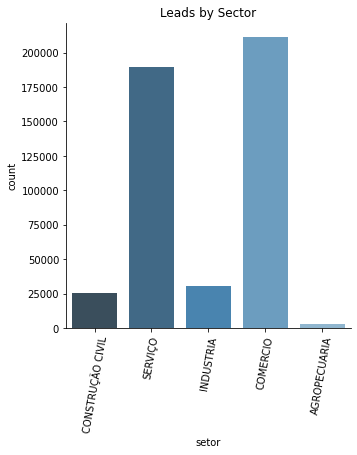

In [36]:
# Sector
sector = sns.catplot(x="setor", 
            kind="count",
            palette="Blues_d", 
            data=df_uf.query('portfolio in (0,1,2,3)'))
sector.set_xticklabels(rotation=80)
plt.title("Leads by Sector");

Portfolios by UF


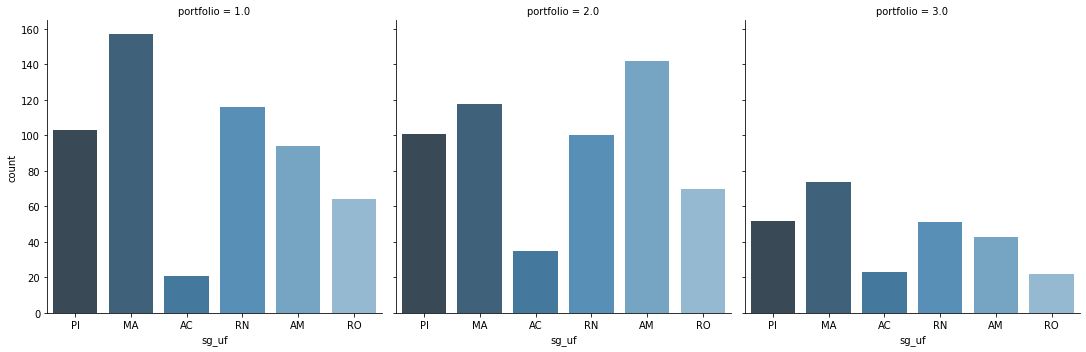

In [37]:
# Portfolios by UF
sns.catplot(x="sg_uf", 
            kind="count", 
            palette="Blues_d", 
            data=df_uf.query('portfolio in (1,2,3)'),
            col="portfolio")
print('Portfolios by UF');

Portfolios by Sector


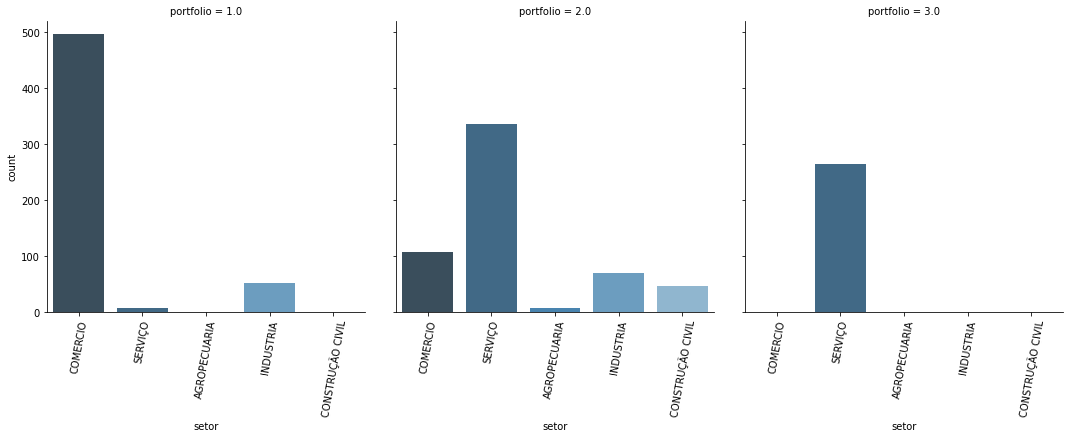

In [38]:
# Portfolios by Sector
sector = sns.catplot(x="setor", 
            kind="count", 
            palette="Blues_d", 
            data=df_uf.query('portfolio in (1,2,3)'),
            col="portfolio")
sector.set_xticklabels(rotation=80)
print('Portfolios by Sector');

In [39]:
# Analyzing the incomes of portfolios
fat1 = df_p1['de_faixa_faturamento_estimado'].value_counts().index[0]
fat2 = df_p2['de_faixa_faturamento_estimado'].value_counts().index[0]
fat3 = df_p3['de_faixa_faturamento_estimado'].value_counts().index[0]
print('Leads from portfolio 1 has an income of', fat1)
print('Leads from portfolio 2 has an income of', fat2)
print('Leads from portfolio 3 has an income of', fat3)

Leads from portfolio 1 has an income of DE R$ 81.000,01 A R$ 360.000,00
Leads from portfolio 2 has an income of DE R$ 10.000.000,01 A R$ 30.000.000,00
Leads from portfolio 3 has an income of DE R$ 30.000.000,01 A R$ 100.000.000,00


In [40]:
# Analyzing the business activity of portfolios
ramo1 = df_p1['de_ramo'].value_counts().index[0]
ramo2 = df_p2['de_ramo'].value_counts().index[0]
ramo3 = df_p3['de_ramo'].value_counts().index[0]
print('Leads from portfolio 1 are from', ramo1)
print('Leads from portfolio 2 are from', ramo2)
print('Leads from portfolio 3 are from', ramo3)

Leads from portfolio 1 are from COMERCIO VAREJISTA
Leads from portfolio 2 are from ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL
Leads from portfolio 3 are from ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL


In [41]:
# Analyzing the portfolios sector
sector1 = df_p1['setor'].value_counts().index[0]
sector2 = df_p2['setor'].value_counts().index[0]
sector3 = df_p3['setor'].value_counts().index[0]
print('Leads from portfolio 1 develop activities in the sector of', sector1)
print('Leads from portfolio 2 develop activities in the sector of', sector2)
print('Leads from portfolio 3 develop activities in the sector of', sector3)

NameError: name 'setor1' is not defined

### Building the Model

In [ ]:
# Selecting training features and normalizing data
x = clean_data[train]
#X =  RobustScaler(quantile_range=(25, 75)).fit_transform(x)
X = Normalizer().fit_transform(x) 

**K-means**

For this solution, it was choosen the KMeans algorithm. It clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of  samples  into  disjoint clusters , each described by the mean 
 of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from , although they live in the same space.

To determine the *k* value, it was applied the **elbow method**.

#### Finding best number of clusters through Elbow Method

In [ ]:
X_elbow = X
wcss = []
 
for i in range(1, 11):
    kmeans_elbow = KMeans(n_clusters = i)
    kmeans_elbow.fit(X_elbow)
    print (i, kmeans_elbow.inertia_)
    wcss.append(kmeans_elbow.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot')
plt.xlabel('Amount of Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

The figure above shows the sum of the data variance in relation to the number of clusters. It is possible to observe that with 3 clusters the distances of the quadratic errors practically stabilize.From that point, there is no such significant discrepancy in terms of variance.Thus, we will adopt k=3.

In [ ]:
# Training model
kmeans = KMeans(n_clusters = 3, n_jobs= -1)
kmeans.fit(X)

In [ ]:
# Checking features centers
kmeans.cluster_centers_

In [ ]:
clean_data.shape

In [ ]:
# Adding labels to dataframe
labels = kmeans.labels_
clean_data['kmeans'] = labels

In [ ]:
# Checking clusters division
print('K-means clusters division ')
clean_data['kmeans'].value_counts()

In [ ]:
# Plotting clusters division
ax = plt.axes(projection ="3d") 
ax.scatter3D(X[:,0], 
             X[:,1],
             X[:,2], 
             c=kmeans.labels_, 
             s=50, 
             cmap='Set2', 
             alpha=0.5)
centers = kmeans.cluster_centers_
ax.scatter3D(centers[:, 0], 
             centers[:,1], 
             centers[:,2], 
             c='black', 
             s=200, 
             alpha=0.5);
plt.show()

### Analysing leads

In [ ]:
# Filtering only one portfolio
df_port = clean_data.query('kmeans == 2 and portfolio not in ("1")')

In [ ]:
# Leads by UF
treemap = df_port['sg_uf'].value_counts(normalize=True)
sizes = treemap.values
label = treemap.index
plt.figure(figsize=(10,8))
sqy.plot(sizes=sizes, label=label, bar_kwargs={'alpha':.5})
plt.title('Leads by UF')
plt.axis('off')
plt.show()

In [ ]:
# Leads by Sector
sns.catplot(x="setor", 
            kind="count", 
            data=df_port)
plt.title('Leads by UF')
plt.xlabel('UF')
plt.ylabel('Leads')
plt.show()

In [ ]:
#Leads by Sub-Sector
df_port['de_ramo'].value_counts().plot(kind='bar', 
                                       colormap='viridis', 
                                       width=0.7, 
                                       alpha=0.6, 
                                       figsize=(13,8))
plt.xticks(rotation=85)
plt.ylabel('Amount of Leads')
plt.xlabel('Subsector')
plt.title('Leads by Sub-Sector ')
plt.show()

#### Performance Validation by Portfolio

In [ ]:
# Clusters validation
X_valida = X
df_valida = clean_data
for i in range(2, 10):
    kmeans_valida = KMeans(n_clusters = i)
    kmeans_valida.fit(X_valida)
    df_valida['kmeans'] = kmeans_valida.labels_
    print('K =', i)
    for j in range(1,4):
        per_valida = df_valida.query('portfolio == @j')['kmeans'].value_counts().max()/df_valida.query('portfolio == @j').shape[0]
        class_valida = df_valida.query('portfolio == @j')['kmeans'].value_counts().index[0]
        print('Portfolio{}'.format(j), 'Cluster', class_valida, '- Correct predictions: {:.0%}'.format(per_valida))
    print(47*'=')

Through performance validation test it is possible to observe that the increase in thecluster number (K) does not increase the number of correct predictions in the portfolios.

With 3 clusters the performance obtained in portfolio1 was 81%%, in portfolio2 it was 73% and in portfolio3 it was 70%. The Cluster 1 represents 81% of its current portfolio1, for example.